In [1]:
!apt-get update
!apt install libgl1-mesa-glx -y
!pip install opencv-python --upgrade
!python -m pip install torchvision 

Hit:1 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:2 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgl1-mesa-glx is already the newest version (21.2.6-0ubuntu0.1~20.04.1).
0 upgraded, 0 newly installed, 0 to remove and 53 not upgraded.
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     |████████████████████████████████| 60.5 MB 20.0 MB/s eta 0:00:01    |████▋                           | 8.7 MB 20.0 MB/s eta 0:00:03
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.5.5.62
    Uninstalling opencv-python-4.5.5.62:
      Successfully uninstalled opencv-python-4.5.5.62
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [4]:
!pip install MTM

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com


In [57]:
# 1st import the package and check its version
import mtm
print("mtm version : ", mtm.__version__)

from mtm import matchTemplates
from mtm.detection import plotDetections

from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

mtm version :  1.0.0


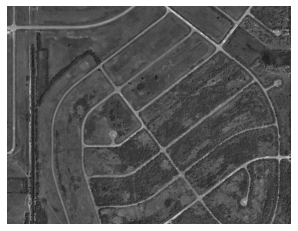

In [78]:
test_image='NewLSTemplates/newLS_drone_highQ.jpg'
image = cv.imread('../../Data/'+test_image,0)
plt.axis("off")
plt.imshow(image, cmap="gray")

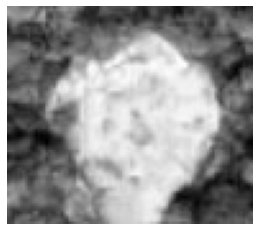

In [79]:
template_image='NewLSTemplates/newLS_sat_dot4_lowQ.jpg'
temp0 = cv.imread('../../Data/'+template_image,0) 
plt.axis("off")
plt.imshow(temp0, cmap="gray")

In [80]:
# First we create 2 lists
listTemplates = [temp0]   # a first list holding the template image(s)
listLabels    = ["temp0"] # a second list holding the associated labels, this list is optional though, as mentioned in the docstring

# Then call the function matchTemplates (here a single template)
listDetections = matchTemplates(image, 
                                listTemplates,
                                listLabels,
                                nObjects=4,
                                scoreThreshold=0.4, 
                                maxOverlap=0.25)

In [81]:
print("Found {} hits".format( len(listDetections) ) )
listDetections

Found 4 hits


[(BoundingBox, score:0.65, xywh:(2311, 1896, 96, 85), index:0, temp0),
 (BoundingBox, score:0.63, xywh:(2655, 1464, 96, 85), index:0, temp0),
 (BoundingBox, score:0.62, xywh:(677, 976, 96, 85), index:0, temp0),
 (BoundingBox, score:0.61, xywh:(2633, 222, 96, 85), index:0, temp0)]

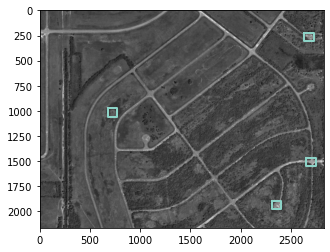

In [82]:
plotDetections(image, listDetections)

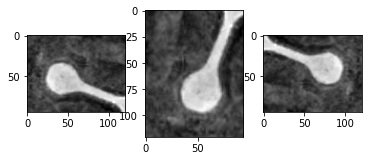

In [75]:
# Initialize list of templates and labels
listTemplates = [temp0]
listLabels    = ["Temp0"]

# Initialise figure showing the rotated templates
f, axarr = plt.subplots(1,3)
axarr[0].imshow(temp0, cmap="gray")

# Perform rotation of the initial template
for i,angle in enumerate([90,180]):
    rotated = np.rot90(temp0, k=i+1) # NB: np.rotate not good here, turns into float!
    listTemplates.append(rotated)
    listLabels.append(str(angle))
    axarr[i+1].imshow(rotated, cmap="gray")
    
    # We could also do some flipping with np.fliplr, flipud

In [76]:
listDetections = matchTemplates(image, 
                                listTemplates,
                                listLabels,
                                nObjects=4, 
                                scoreThreshold=0.4, 
                                maxOverlap=0.3)

listDetections

[(BoundingBox, score:0.60, xywh:(2618, 228, 121, 94), index:2, 180),
 (BoundingBox, score:0.58, xywh:(2315, 1873, 94, 121), index:1, 90),
 (BoundingBox, score:0.57, xywh:(714, 1072, 94, 121), index:1, 90),
 (BoundingBox, score:0.55, xywh:(793, 286, 121, 94), index:2, 180)]

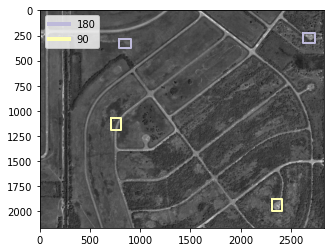

In [77]:
plotDetections(image, listDetections, showLegend=True)

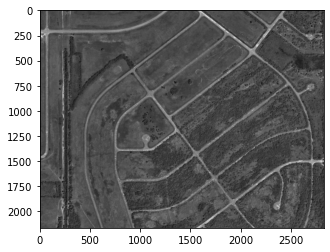

In [48]:
test_image='NewLSTemplates/newLS_drone_highQ.jpg'

image =cv.imread('../../Data/'+test_image,0)
plt.imshow(image,cmap = 'gray')

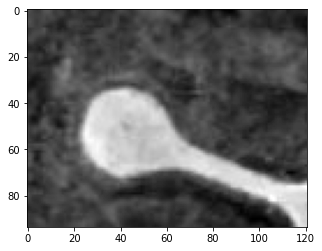

In [49]:
template_image='NewLSTemplates/newLS_sat_dot3_lowQ.jpg'
smallCoin = cv.imread('../../Data/'+template_image,0) 
plt.imshow(smallCoin, cmap="gray")

In [50]:
# Create a list holding the template(s)
listTemplate = [smallCoin]

# Then call the function matchTemplates (here a single template)
listDetections = matchTemplates(image, 
                                listTemplate, 
                                scoreThreshold=0.5, 
                                maxOverlap=0)

In [51]:
print("Found {} hits".format( len(listDetections) ) )
listDetections

Found 0 hits


[]

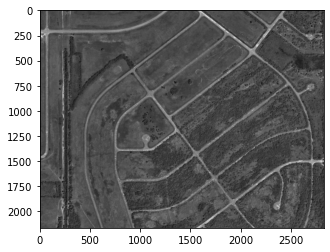

In [52]:
plotDetections(image, listDetections)

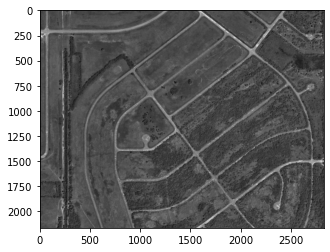

In [56]:
listDetections = matchTemplates(image, listTemplate, scoreThreshold=0.5, maxOverlap=0)
plotDetections(image, listDetections, showScore=False)

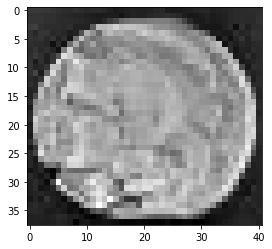

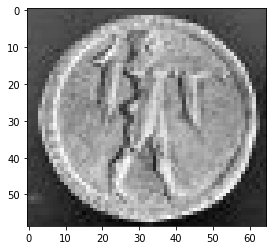

In [14]:
largeCoin = coins()[14:14+59,302:302+65]
plt.figure(0)
plt.imshow(smallCoin, cmap="gray")
plt.figure(1)
plt.imshow(largeCoin, cmap="gray")

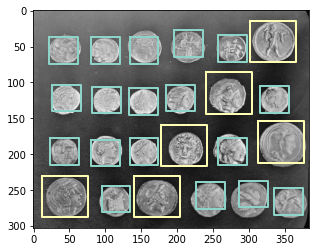

In [15]:
listTemplates = [smallCoin, largeCoin]
listDetections = matchTemplates(image, listTemplates, scoreThreshold=0.4, maxOverlap=0)
plotDetections(image, listDetections)